<a href="https://colab.research.google.com/github/Salvini126/informatica/blob/main/correzione_verifica_geopandasx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install contextily

In [43]:
import contextily
%matplotlib inline

import pandas as pd
import geopandas

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
corsiAcq = geopandas.read_file("/content/drive/MyDrive/Corsi_acqua_Piano_di_Gestione.zip")
corsiAcq.head()

In [46]:
comu = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")

In [47]:
prov = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")

In [48]:
reg = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Reg01012021_g")

COME ANDAVA FATTO ES.1

ins una regiona: Lazio


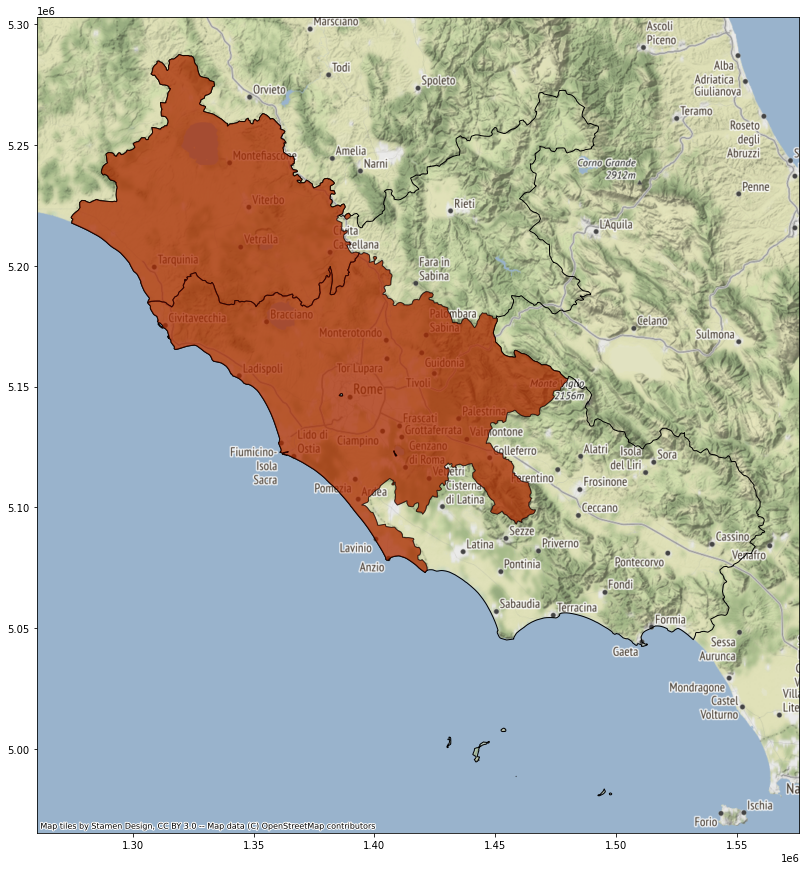

In [59]:
input_reg = input("ins una regiona: ")
if input_reg in list (reg.DEN_REG):
  regi = reg[reg.DEN_REG==input_reg]
  prov_reg=prov[prov.within(regi.geometry.squeeze())]
  media = prov_reg.Shape_Area.mean()
  prov_sup = prov_reg[prov_reg.Shape_Area >= media]
  prov_inf = prov_reg[prov_reg.Shape_Area < media]
  ax= regi.to_crs(epsg=3857).plot(figsize=(15,15), facecolor="none",edgecolor="k")
  prov_sup.to_crs(epsg=3857).plot(ax=ax, facecolor="green",edgecolor="k",alpha=0.5)
  prov_sup.to_crs(epsg=3857).plot(ax=ax, facecolor="red",edgecolor="k",alpha=0.5)
  contextily.add_basemap(ax, crs=3857)
else:
    print("non esiste")

COME ANDAVA FATTA ES.2

In [50]:
provGrande=prov[prov["Shape_Area"]==prov["Shape_Area"].max()]
provConf=prov[prov.touches(provGrande.geometry.squeeze())]

In [51]:
provGrande

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
89,5,20,90,0,90,Sassari,-,Sassari,SS,Provincia,905825.725858,7.693245e+09,"MULTIPOLYGON (((443843.913 4483390.792, 443817..."


In [52]:
provConf

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
90,5,20,91,0,91,Nuoro,-,Nuoro,NU,Provincia,555178.684320,5.639160e+09,"MULTIPOLYGON (((560275.001 4425014.251, 560096..."
94,5,20,95,0,95,Oristano,-,Oristano,OR,Provincia,380735.929103,2.989333e+09,"MULTIPOLYGON (((438105.344 4414838.331, 438069..."


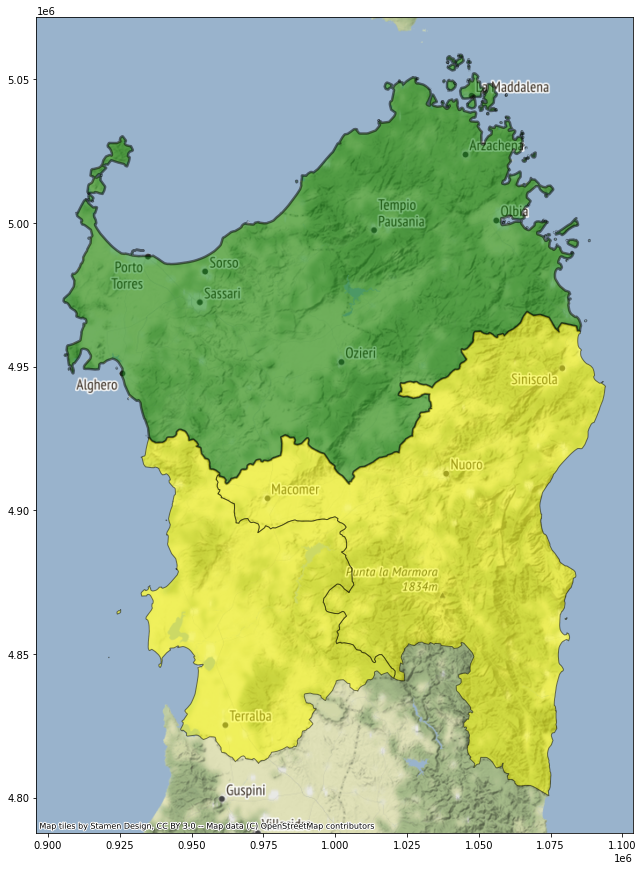

In [53]:
ax=provGrande.to_crs(epsg=3857).plot(figsize=(15,15), facecolor="green",alpha=0.5,edgecolor="k",linewidth=2.5)
provConf.to_crs(epsg=3857).plot(ax=ax, facecolor="yellow",alpha=0.5,edgecolor="k")
contextily.add_basemap(ax)

COME L'HO FATTO IO ES.3

In [54]:
lombardia=reg[reg.DEN_REG=="Lombardia"].geometry.squeeze()

In [55]:
provLomb=prov[prov.within(lombardia)]

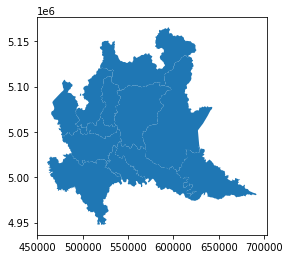

In [56]:
provLomb.plot()

In [57]:
nomFiu = input("Inserire il nome di un fiume: ")
if fiume = corsiAcq[corsiAcq["NOME"] == nomFiu] :
  

SyntaxError: ignored

In [ ]:
nomFiu = input("Inserire il nome di un fiume: ")
fiume = corsiAcq[corsiAcq["NOME"] == nomFiu]
squeeze_fiume = fiume.geometry.squeeze()

comuni_attra_fiume =  comu[comu.intersects(squeeze_fiume)]
comuni_attra_fiume

ax = fiume.to_crs(epsg = 3857).plot(figsize=(10,10), edgecolor = "b", linewidth = 4)
comuni_attra_fiume.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y", alpha = 0.3 ,linewidth=4, edgecolor = "k" )
contextily.add_basemap(ax)

COME ANDAVA FATTA ES.3